In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.3
learning_rate=1e-3
wd=1e-4
num_folds = 5

#folds only include training data
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)

In [6]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


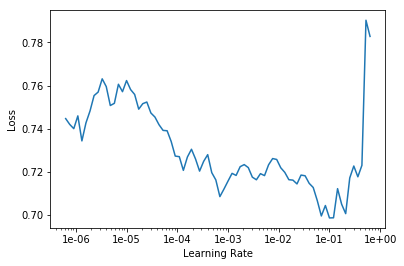

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.662083    0.662907    0.594203  (00:01)
2      0.661286    0.508128    0.758454  (00:00)
3      0.601289    0.520992    0.743961  (00:00)
4      0.566186    0.469013    0.743961  (00:00)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:45
epoch  train_loss  valid_loss  accuracy
1      0.597436    0.541924    0.748792  (00:02)
2      0.496763    0.436432    0.753623  (00:02)
3      0.536930    0.422731    0.782609  (00:02)
4      0.528695    0.533514    0.787440  (00:02)
5      0.461491    0.352239    0.826087  (00:02)
6      0.452689    0.346347    0.845411  (00:02)
7      0.455644    0.648744    0.714976  (00:02)
8      0.407881    0.344193    0.830918  (00:02)
9      0.367754    0.326319    0.859903  (00:02)
10     0.382616    0.321875    0.859903  (00:02)
11     0.402553    0.323966    0.835749  (00:02)
12     0.385585    0.333302    0.864734  (00:02)
13     0.356478    0.309448    0.874396  (00:02)
14     0.393091    0.353473    0.845411  (00:01)
15     0.353831    0.335090    0.855072  (00:02)
16     0.324960    0.342855    0.850242  (00:02)
17     0.326557    0.466794    0.835749  (00:02)
18     0.363188    0.291119    0.879227  (00:02)
19     0.364521    0.311219    0.874396  (00:01)
20     0.28

In [11]:
learn.validate()

[0.32378778, tensor(0.8792)]

In [12]:
accuracy_list.append(learn.validate()[1].item())

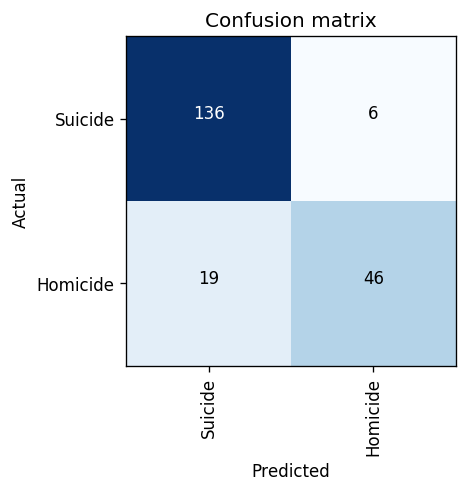

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

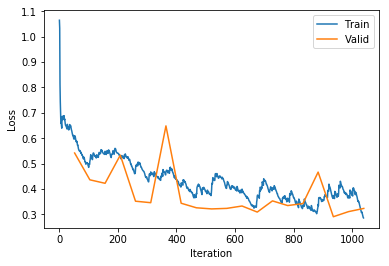

In [14]:
learn.recorder.plot_losses()

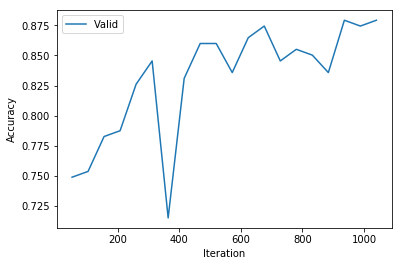

In [15]:
learn.recorder.plot_metrics()

In [16]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


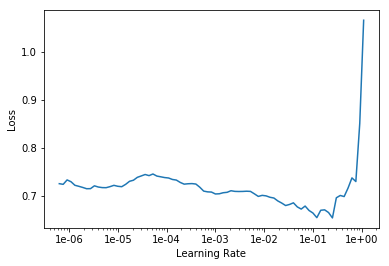

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.643436    0.506806    0.734300  (00:01)
2      0.603343    0.500881    0.763285  (00:00)
3      0.584103    0.488458    0.743961  (00:00)
4      0.584403    0.522738    0.734300  (00:00)



In [20]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:45
epoch  train_loss  valid_loss  accuracy
1      0.590472    0.605217    0.729469  (00:02)
2      0.563280    0.611409    0.647343  (00:02)
3      0.487104    0.440015    0.743961  (00:02)
4      0.514850    0.415061    0.777778  (00:02)
5      0.457214    0.348739    0.855072  (00:02)
6      0.432751    0.390609    0.777778  (00:02)
7      0.463640    0.328708    0.874396  (00:02)
8      0.449096    0.352206    0.821256  (00:02)
9      0.430809    0.402907    0.855072  (00:02)
10     0.425091    0.342999    0.835749  (00:02)
11     0.366025    0.320968    0.869565  (00:02)
12     0.349315    0.428946    0.821256  (00:02)
13     0.351325    0.301467    0.879227  (00:02)
14     0.351162    0.301578    0.864734  (00:02)
15     0.340128    0.308924    0.869565  (00:02)
16     0.312117    0.533854    0.845411  (00:02)
17     0.314098    0.299250    0.859903  (00:02)
18     0.360308    0.275890    0.893720  (00:02)
19     0.313123    0.287260    0.869565  (00:02)
20     0.28

In [21]:
learn.validate()

[0.28610024, tensor(0.8551)]

In [22]:
accuracy_list.append(learn.validate()[1].item())

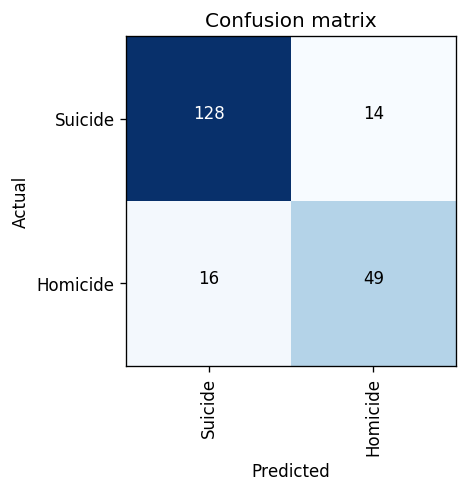

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

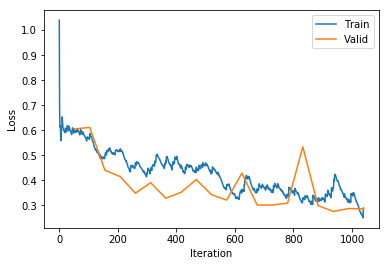

In [24]:
learn.recorder.plot_losses()

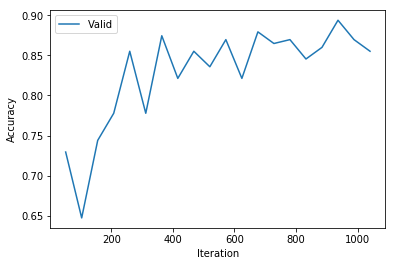

In [25]:
learn.recorder.plot_metrics()

In [26]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [27]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


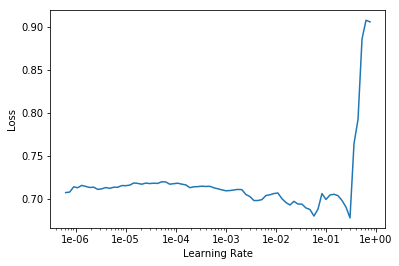

In [28]:
learn.recorder.plot()

In [29]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.626438    0.594476    0.690821  (00:00)
2      0.632856    0.574887    0.719807  (00:00)
3      0.604616    0.536619    0.739130  (00:00)
4      0.549883    0.502163    0.768116  (00:00)



In [30]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:45
epoch  train_loss  valid_loss  accuracy
1      0.526880    0.817766    0.444444  (00:02)
2      0.549329    0.451807    0.758454  (00:02)
3      0.499106    0.403271    0.816425  (00:02)
4      0.505560    0.352249    0.859903  (00:02)
5      0.462260    0.405010    0.768116  (00:02)
6      0.478937    0.352325    0.840580  (00:02)
7      0.470349    0.407066    0.782609  (00:02)
8      0.420978    0.299221    0.879227  (00:02)
9      0.427007    0.366374    0.830918  (00:02)
10     0.435557    0.312871    0.864734  (00:02)
11     0.367934    0.291921    0.855072  (00:02)
12     0.420783    0.340860    0.855072  (00:01)
13     0.351437    0.331958    0.835749  (00:02)
14     0.352095    0.474188    0.816425  (00:02)
15     0.295329    0.262143    0.888889  (00:02)
16     0.316015    0.334679    0.845411  (00:02)
17     0.278187    0.326646    0.850242  (00:02)
18     0.316636    0.350180    0.850242  (00:02)
19     0.285344    0.298057    0.864734  (00:02)
20     0.28

In [31]:
learn.validate()

[0.32745817, tensor(0.8744)]

In [32]:
accuracy_list.append(learn.validate()[1].item())

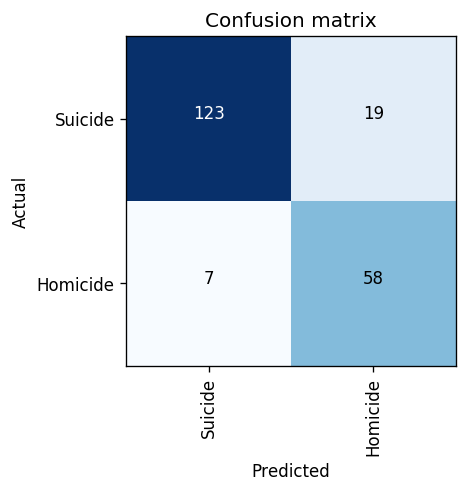

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

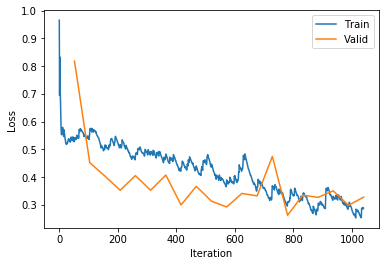

In [34]:
learn.recorder.plot_losses()

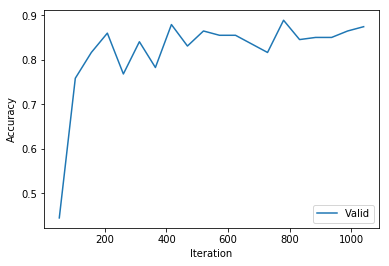

In [35]:
learn.recorder.plot_metrics()

In [36]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [37]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


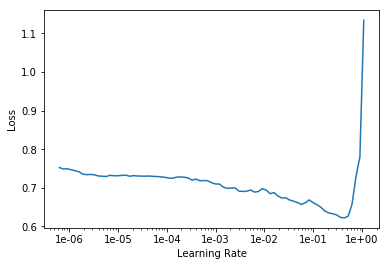

In [38]:
learn.recorder.plot()

In [39]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:03
epoch  train_loss  valid_loss  accuracy
1      0.655474    0.550067    0.753623  (00:00)
2      0.600533    0.506941    0.758454  (00:00)
3      0.557741    0.458038    0.763285  (00:00)
4      0.503127    0.468346    0.753623  (00:01)



In [40]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:44
epoch  train_loss  valid_loss  accuracy
1      0.571770    0.662076    0.550725  (00:02)
2      0.572165    0.442563    0.782609  (00:01)
3      0.548237    0.441783    0.787440  (00:02)
4      0.495925    0.548690    0.729469  (00:02)
5      0.445209    0.341429    0.811594  (00:02)
6      0.468816    0.437446    0.792271  (00:02)
7      0.416273    0.317427    0.864734  (00:02)
8      0.408721    0.308810    0.879227  (00:02)
9      0.414024    0.394793    0.821256  (00:02)
10     0.418310    0.321731    0.864734  (00:01)
11     0.384027    0.286192    0.888889  (00:02)
12     0.401264    0.314047    0.859903  (00:02)
13     0.414433    0.340111    0.855072  (00:02)
14     0.382221    0.315146    0.850242  (00:02)
15     0.348340    0.346158    0.859903  (00:02)
16     0.306774    0.328448    0.869565  (00:02)
17     0.306518    0.331287    0.874396  (00:02)
18     0.288553    0.319841    0.864734  (00:02)
19     0.366961    0.313266    0.874396  (00:01)
20     0.36

In [41]:
learn.validate()

[0.43931794, tensor(0.8406)]

In [42]:
accuracy_list.append(learn.validate()[1].item())

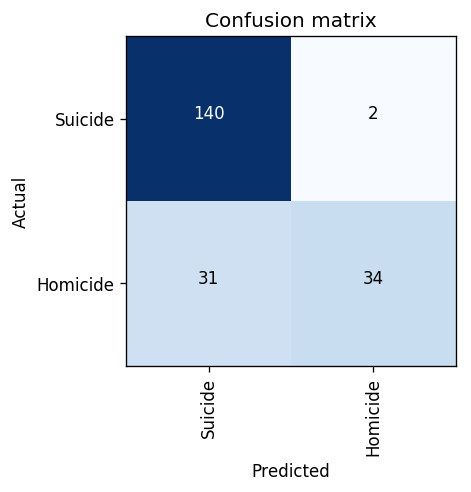

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

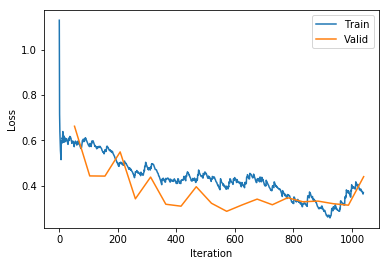

In [44]:
learn.recorder.plot_losses()

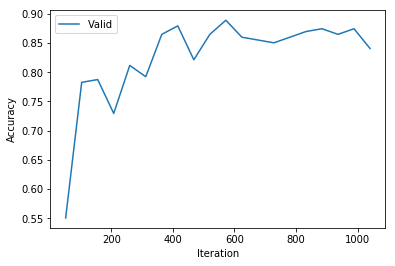

In [45]:
learn.recorder.plot_metrics()

In [46]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [47]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


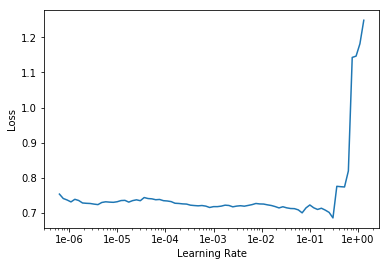

In [48]:
learn.recorder.plot()

In [49]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.612133    0.531960    0.772947  (00:01)
2      0.575071    0.530280    0.743961  (00:01)
3      0.525274    0.505375    0.763285  (00:01)
4      0.539566    0.513744    0.753623  (00:00)



In [50]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:45
epoch  train_loss  valid_loss  accuracy
1      0.512049    0.510669    0.739130  (00:02)
2      0.497650    0.402960    0.801932  (00:02)
3      0.462977    0.441443    0.806763  (00:02)
4      0.484322    0.398454    0.782609  (00:02)
5      0.507977    0.396836    0.811594  (00:02)
6      0.481991    0.356857    0.840580  (00:02)
7      0.449398    0.335116    0.826087  (00:02)
8      0.449775    0.316386    0.850242  (00:02)
9      0.468818    0.313432    0.840580  (00:01)
10     0.451094    0.299058    0.869565  (00:02)
11     0.400573    0.301859    0.864734  (00:02)
12     0.390160    0.458254    0.777778  (00:02)
13     0.357966    0.327086    0.830918  (00:02)
14     0.369853    0.299078    0.859903  (00:02)
15     0.382573    0.278321    0.879227  (00:02)
16     0.386937    0.267189    0.884058  (00:02)
17     0.374477    0.278058    0.859903  (00:02)
18     0.331321    0.433269    0.811594  (00:02)
19     0.317941    0.286527    0.855072  (00:02)
20     0.34

In [51]:
learn.validate()

[0.3353046, tensor(0.8599)]

In [52]:
accuracy_list.append(learn.validate()[1].item())

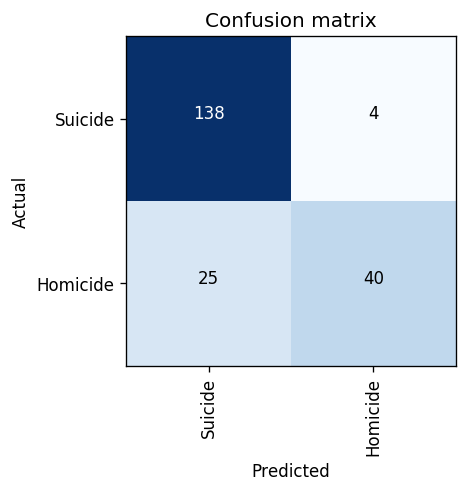

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

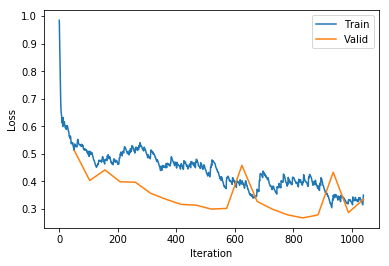

In [54]:
learn.recorder.plot_losses()

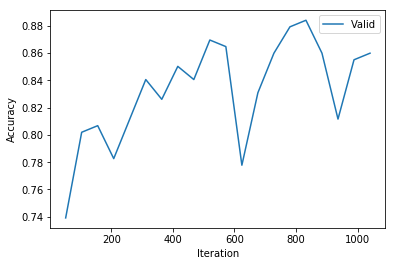

In [55]:
learn.recorder.plot_metrics()

In [56]:
print(accuracy_list)

[0.8792270421981812, 0.8550724387168884, 0.8743961453437805, 0.8405796885490417, 0.8599033951759338]


In [57]:
print(sum(accuracy_list)/len(accuracy_list))

0.8618357419967652


In [58]:

data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [59]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:04
epoch  train_loss  valid_loss  accuracy
1      0.626578    0.530225    0.779923  (00:01)
2      0.544259    0.453175    0.772201  (00:01)
3      0.577867    0.481384    0.741313  (00:01)
4      0.537922    0.510954    0.752896  (00:01)



In [60]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 00:56
epoch  train_loss  valid_loss  accuracy
1      0.624494    0.493443    0.764479  (00:02)
2      0.532046    0.415810    0.833977  (00:02)
3      0.511225    0.360864    0.845560  (00:02)
4      0.503197    0.365938    0.826255  (00:02)
5      0.518985    0.310308    0.884170  (00:02)
6      0.471917    0.302698    0.891892  (00:03)
7      0.417744    0.276824    0.876448  (00:03)
8      0.461713    0.281373    0.895753  (00:02)
9      0.463716    0.298670    0.888031  (00:02)
10     0.384574    0.508097    0.779923  (00:02)
11     0.391531    0.294494    0.884170  (00:02)
12     0.353443    0.360768    0.861004  (00:02)
13     0.334339    0.387244    0.853282  (00:02)
14     0.396486    0.283444    0.872587  (00:02)
15     0.350974    0.284050    0.884170  (00:02)
16     0.310104    0.308927    0.868726  (00:03)
17     0.309858    0.724933    0.787645  (00:03)
18     0.342170    0.269691    0.903475  (00:02)
19     0.353035    0.263105    0.903475  (00:02)
20     0.33

In [61]:
learn.validate()

[0.29132113, tensor(0.9112)]

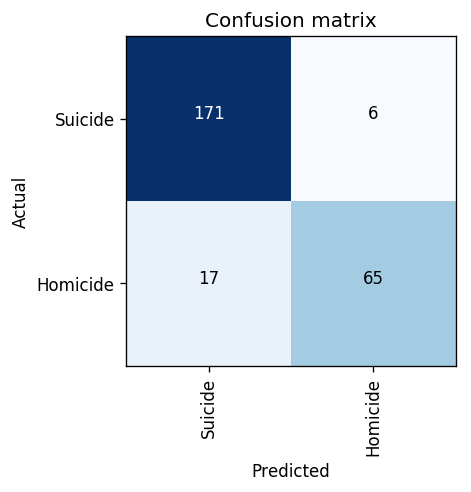

In [62]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [63]:
import torch

torch.cuda.empty_cache()